<h4>MODELOS Y SIMULACION</h4>

En la clase de hoy veremos Regresion Logística y kNN.

Para esta semana, siguen abiertas las Office Hours con el mismo link de siempre.



-

In [329]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors

In [330]:
# Cargamos la data
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [331]:
# Notemos que hay variables que no aportan al modelo como RowNumber, CustomerId y Surname
df = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [332]:
# Tenemos variables que debemos cambiar su forma de representacion como Geography y Gender
# Creamos los valores para geography
#geography = pd.factorize(df['Geography'])
#geography

(array([0, 1, 0, ..., 0, 2, 0]),
 Index(['France', 'Spain', 'Germany'], dtype='object'))

In [333]:
# Obtenemos el indice donde se encontraba Geogrpahy
index = df.columns.get_loc('Geography')
# Eliminamos la columna
df = df.drop('Geography', axis=1)
# Insertamos la nueva
df.insert(index, 'Geography', geography[0])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,608,1,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,850,1,Female,43,2,125510.82,1,1,1,79084.10,0


In [334]:
# Creamos los valores para Gender
gender = pd.factorize(df['Gender'])
# Obtenemos el indice donde se encontraba Gender
index = df.columns.get_loc('Gender')
# Eliminamos la columna
df = df.drop('Gender', axis=1)
# Insertamos la nueva
df.insert(index, 'Gender', gender[0])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


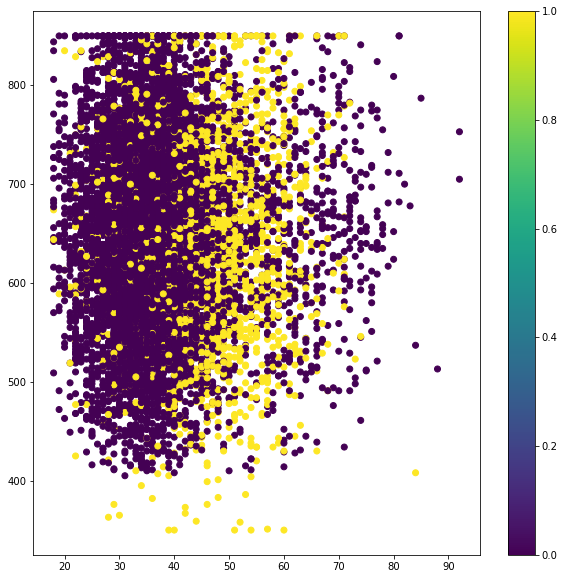

In [335]:
#Veamos como influye el credit score y la edad en la decision de abandonar el producto
x = df['Age']
y = df['CreditScore']
e = df['Exited']
plt.scatter(x,y,c=e)
plt.colorbar()
plt.show()

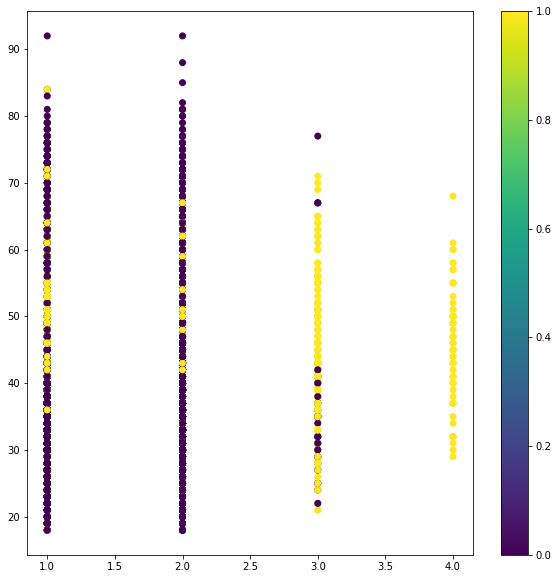

In [336]:
#Veamos como influye la edad y la cantidad de productos en la decision de abandonar el producto
x = df['NumOfProducts']
y = df['Age']
e = df['Exited']
plt.scatter(x,y,c=e)
plt.colorbar()
plt.show()

<h5>Regresión Logística</h5>

Vamos a usar la libreria SKLearn para generar y entrenar nuestro modelo. Luego graficaremos el espacio de soluciones

In [337]:
y = df['Exited']
x = df.drop('Exited', axis=1)
rlog = LogisticRegression().fit(x, y)
# Classes nos devuelve que tipos de etiquetas usa el clasificador
rlog.classes_

array([0, 1])

In [338]:
# Veamos los coeficientes 
rlog.coef_

array([[-5.03585720e-03,  1.56218586e-03, -1.03853584e-03,
         4.37994243e-02, -1.59075948e-03,  3.61853503e-06,
        -4.45887716e-04, -1.86759998e-04, -1.41742761e-03,
        -1.36186225e-06]])

In [339]:
# Prediccion para cada input
rlog.predict_proba(x)

array([[0.80550561, 0.19449439],
       [0.75363885, 0.24636115],
       [0.56961686, 0.43038314],
       ...,
       [0.88736952, 0.11263048],
       [0.87067069, 0.12932931],
       [0.91295706, 0.08704294]])

In [328]:
# Y si queremos cambiar el threshold? Default =0.5
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,1,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,1,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,2,1,42,3,75075.31,2,1,0,92888.52


In [283]:
# Calculemos el error
y = df['Exited']
x = df.drop('Exited', axis=1)
difference = y - rlog.predict(x)
count = 0
for i in range(0, difference.size):
    # aquellas que calculo bien
    if difference[i] == 0:
        count +=1
accuracy = count/difference.size
accuracy

0.7899

In [284]:
# Aqui calculado por ela libreria
rlog.score(x, y)

0.7899

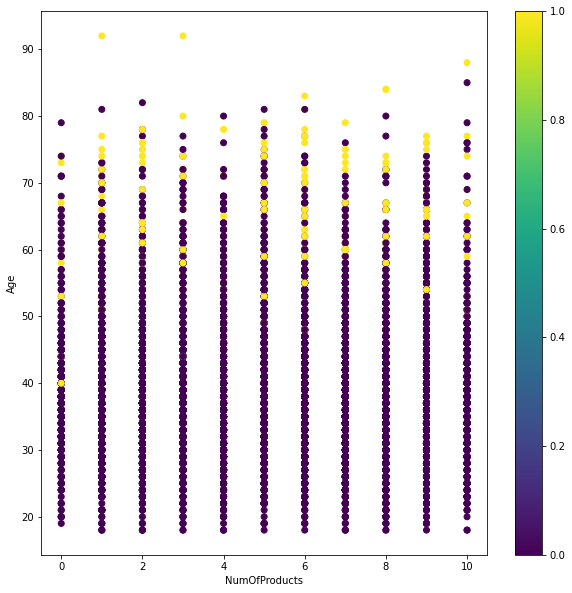

In [322]:
# Grafiquemos nuestra solucion
x_values = df['NumOfProducts']
y = df['Age']
e = rlog.predict(x)
plt.scatter(x_value,y,c=e)
plt.colorbar()

plt.xlabel('NumOfProducts')
plt.ylabel('Age')
plt.show()

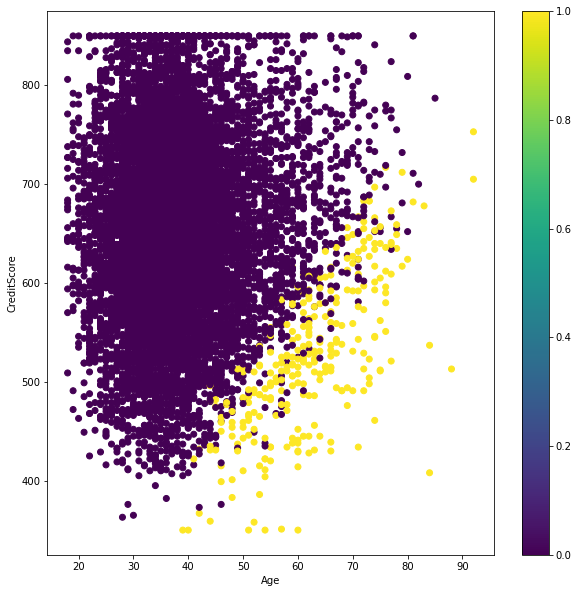

In [323]:
#Veamos como influye el credit score y la edad en la decision de abandonar el producto
X = df['Age']
y = df['CreditScore']
e = rlog.predict(x)
plt.scatter(X,y,c=e)
plt.colorbar()
plt.xlabel('Age')
plt.ylabel('CreditScore')
plt.show()

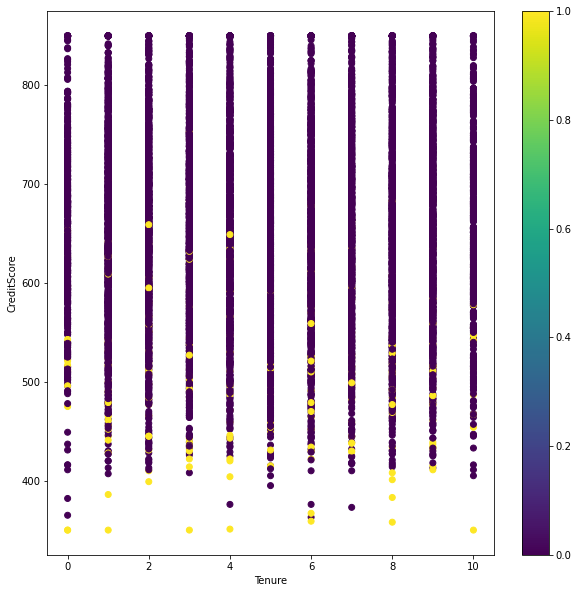

In [324]:
#Veamos como influye el credit score y la edad en la decision de abandonar el producto
x_value = df['Tenure']
y = df['CreditScore']
e = rlog.predict(x)
plt.scatter(x_value,y,c=e)
plt.colorbar()
plt.xlabel('Tenure')
plt.ylabel('CreditScore')
plt.show()

<h5>K-Nearest Neighbours</h5>

In [318]:
y = df['Exited']
x = df.drop('Exited', axis=1)
k = 5
# Existe el modo Uniform (cada distancia tiene igual importancia) o Distance (mas peso a los mas
# cercanos)
knn = neighbors.KNeighborsClassifier(k, weights='uniform').fit(x, y)

In [319]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [320]:
knn.score(x,y)

0.8163

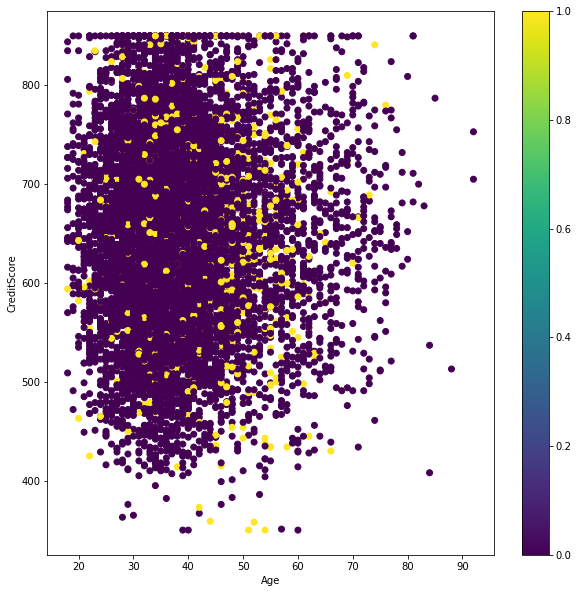

In [325]:
#Veamos como influye el credit score y la edad en la decision de abandonar el producto
X = df['Age']
y = df['CreditScore']
e = knn.predict(x)
plt.scatter(X,y,c=e)
plt.colorbar()
plt.xlabel('Age')
plt.ylabel('CreditScore')
plt.show()